In [32]:
%matplotlib inline

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [34]:
def real_function():
    length = 20
    x = np.linspace(-3, 5, length)
    y = 2 * x + 3
    y_noise = np.random.normal(loc=0, scale=2, size=length)
    y += y_noise
    return x, y

In [40]:
x, y = real_function()
x, y

(array([-3.        , -2.57894737, -2.15789474, -1.73684211, -1.31578947,
        -0.89473684, -0.47368421, -0.05263158,  0.36842105,  0.78947368,
         1.21052632,  1.63157895,  2.05263158,  2.47368421,  2.89473684,
         3.31578947,  3.73684211,  4.15789474,  4.57894737,  5.        ]),
 array([-1.74133661, -5.70675654, -2.80576644, -1.57239384,  0.94507724,
         1.52318027, -1.40449273,  3.60163004,  4.01016297,  7.52792229,
         5.28441286,  4.46915467,  6.36150394,  6.89164421,  7.64121877,
        11.76783962, 13.73338969, 14.91429521, 16.17246532, 15.40866635]))

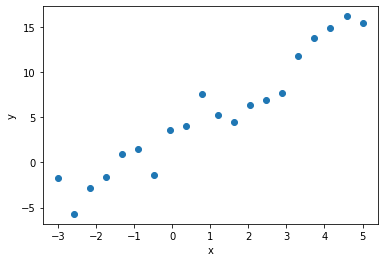

In [41]:
plt.scatter(x, y)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

In [43]:
y_predicted = 3 * x

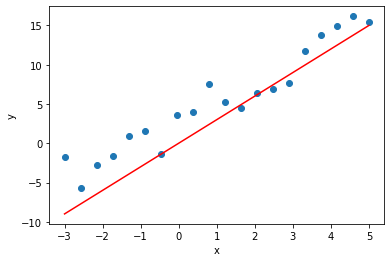

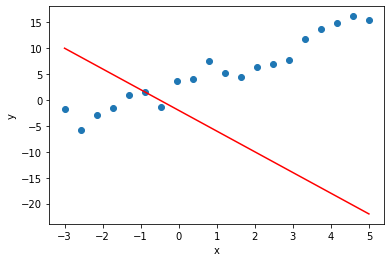

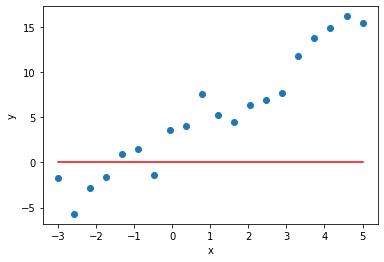

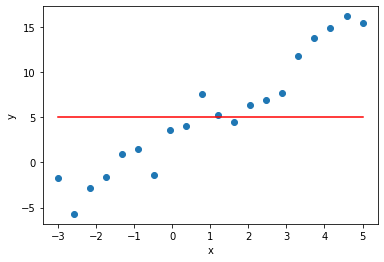

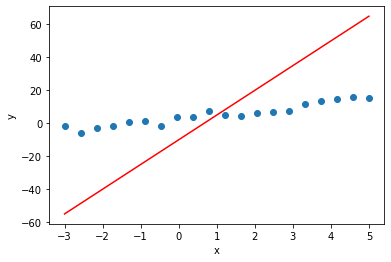

In [50]:
for y_predicted in [3 * x, -4 * x - 2, np.zeros(len(x)), np.ones(len(x)) * 5, 15 * x - 10]:
    plt.scatter(x, y)
    
    plt.plot(x, y_predicted, color="r")

    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

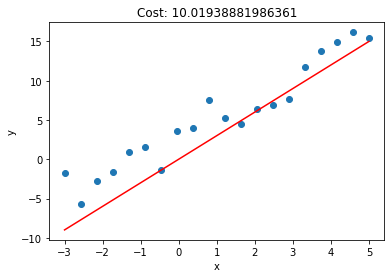

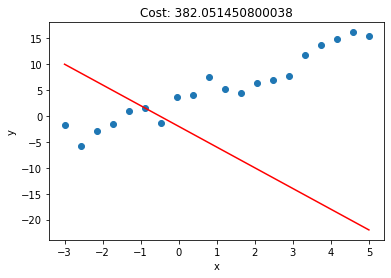

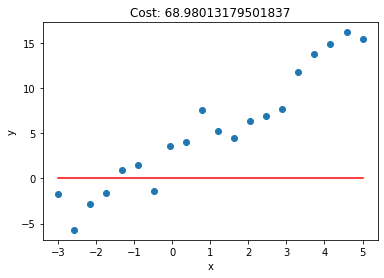

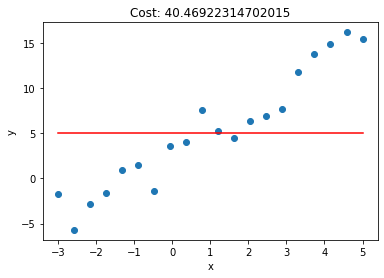

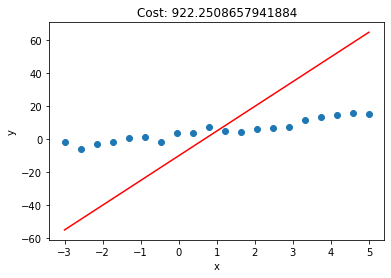

In [60]:
for y_predicted in [3 * x, -4 * x - 2, np.zeros(len(x)), np.ones(len(x)) * 5, 15 * x - 10]:
    plt.scatter(x, y)
    
    plt.plot(x, y_predicted, color="r")

    plt.xlabel("x")
    plt.ylabel("y")
    
    mse = np.mean((y_predicted - y) ** 2)
    plt.title(f"Cost: {mse}")
    
    plt.show()

In [61]:
def preform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)

In [63]:
preform_gradient_descent(x, y, 3, 0, 0.001)

(2.9989693704654026, 0.004702181729599644)

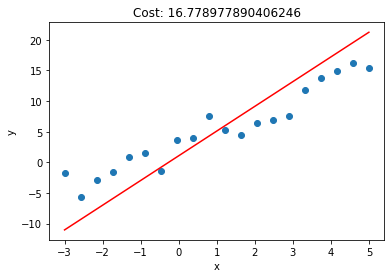

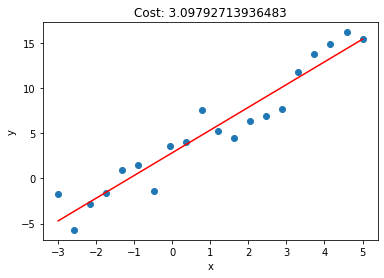

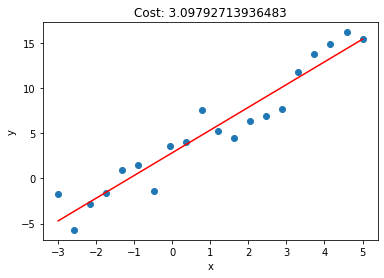

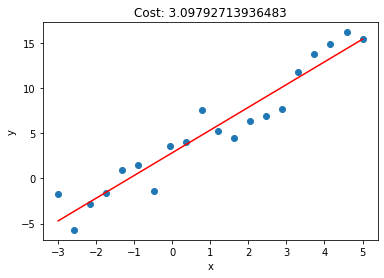

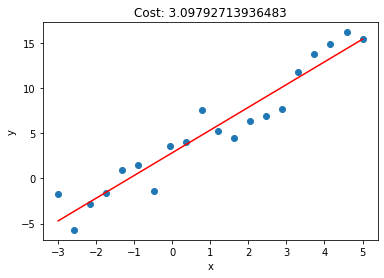

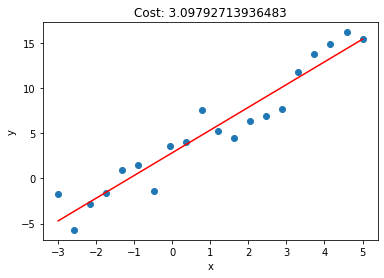

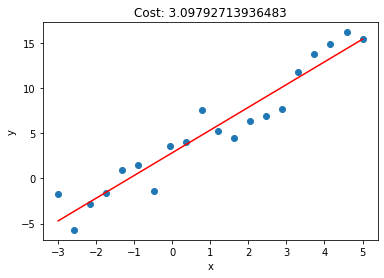

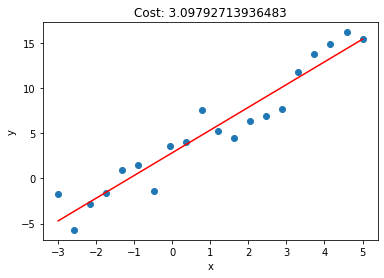

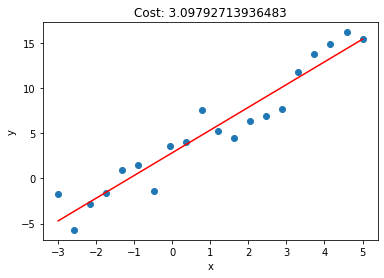

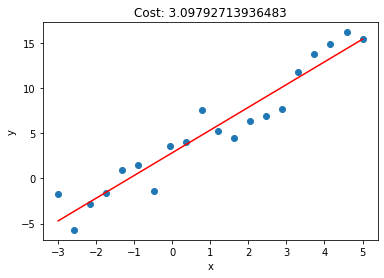

2.513734758840418 2.8373561059594037


In [90]:
a = 0
b = 0
learning_rate = 0.1
for i in range(10000):
    a, b = preform_gradient_descent(x, y, a, b, learning_rate)
    
    if i % 1000 == 0:
        plt.scatter(x, y)
        y_predicted = a * x + b
        plt.plot(x, y_predicted, color="r")

        plt.xlabel("x")
        plt.ylabel("y")

        mse = np.mean((y_predicted - y) ** 2)
        plt.title(f"Cost: {mse}")
        plt.show()

print(a,b)

In [85]:
model = LinearRegression()
model.fit(x.reshape(len(x), 1), y)

LinearRegression()

In [86]:
model.coef_, model.intercept_

(array([2.51373476]), 2.8373561059594046)

In [95]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu